# Cell edge bias during growth rate calculation 

### Author: Alexandros Papagiannakis, HHMI @ Stanford University, 2024

In this set of simulations I demonstrate how cell segmentation errors near the cell boundaries, may lead to artifacts in growth rate calculation and a false increase in the lative growth rate over the cell area.

The simulations are performed for different amounts of cell area over-estimation, from 0 to 1 μm.

Citation: [PMID 39714909](https://elifesciences.org/articles/97465)

In [1]:
import matplotlib.pyplot as plt

In [2]:
def get_final_area(initial_area, relative_gr):
    
    return relative_gr * initial_area + initial_area

def get_biased_statistics(initial_area, relative_gr, over_estimation):
    
    final_area = get_final_area(initial_area, relative_gr)
    
    biased_initial_area = initial_area + over_estimation
    biased_final_area = final_area + over_estimation
    
    return biased_initial_area, biased_final_area, (biased_final_area-biased_initial_area)/biased_initial_area
    
def run_biased_simulation(initial_area, relative_gr, over_estimation, iterations):
    
    biased_gr_list = []
    biased_area_list = []
    
    for i in range(iterations):
        
        bia, bfa, bgr = get_biased_statistics(initial_area, relative_gr, over_estimation)
        initial_area = bfa
        biased_gr_list.append(bgr)
        biased_area_list.append(bia)
        
    return biased_area_list, biased_gr_list
        


In [3]:
biased_area_list_0, biased_gr_list_0 = run_biased_simulation(1, 0.0014, 0, 10000)
biased_area_list_1, biased_gr_list_1 = run_biased_simulation(1-0.01, 0.0014, 0.01, 1000)
biased_area_list_2, biased_gr_list_2 = run_biased_simulation(1-0.05, 0.0014, 0.05, 500)
biased_area_list_3, biased_gr_list_3 = run_biased_simulation(1-0.1, 0.0014, 0.1, 200)
biased_area_list_4, biased_gr_list_4 = run_biased_simulation(1-0.2, 0.0014, 0.2, 200)
biased_area_list_5, biased_gr_list_5 = run_biased_simulation(1-0.35, 0.0014, 0.35, 200)
biased_area_list_6, biased_gr_list_6 = run_biased_simulation(1-0.5, 0.0014, 0.5, 200)
biased_area_list_7, biased_gr_list_7 = run_biased_simulation(1-1, 0.0014, 1, 200)

(1.0, 11.0)

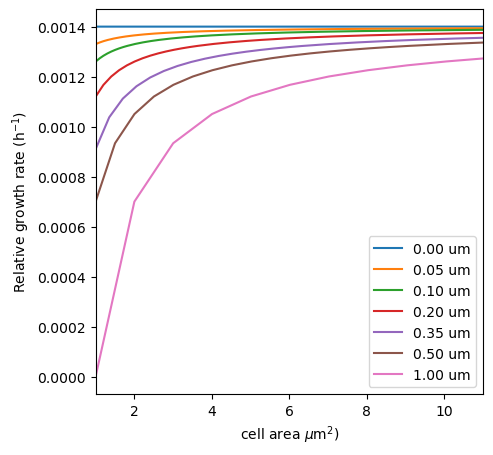

In [7]:
plt.figure(figsize=(5,5))
plt.plot(biased_area_list_0, biased_gr_list_0, label='0.00 um')
# plt.plot(biased_area_list_1, biased_gr_list_1, label='0.01 um')
plt.plot(biased_area_list_2, biased_gr_list_2, label='0.05 um')
plt.plot(biased_area_list_3, biased_gr_list_3, label='0.10 um')
plt.plot(biased_area_list_4, biased_gr_list_4, label='0.20 um')
plt.plot(biased_area_list_5, biased_gr_list_5, label='0.35 um')
plt.plot(biased_area_list_6, biased_gr_list_6, label='0.50 um')
plt.plot(biased_area_list_7, biased_gr_list_7, label='1.00 um')
plt.legend()
plt.xlabel(r'cell area $\mu$m$^{2}$)')
plt.ylabel('Relative growth rate (h$^{-1}$)')
plt.xlim(1,11)
# plt.axhline(0.0014, linestyle='--', linewidth=0.5, color='black')